<a href="https://colab.research.google.com/github/uahmed20255/stock-predictor/blob/main/Copy_of_stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this program uses an artificial recuurent neural network called Long Short Term memory (LTSM)
#

In [2]:
# import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd

# Get the stock quote
data = yf.download('AAPL', start='2017-01-01', end='2024-07-29')
df = pd.DataFrame(data)  # Convert to a Pandas DataFrame
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.952705,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.922543,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.059454,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.361126,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.611738,134247600
...,...,...,...,...,...,...
2024-07-22,227.009995,227.779999,223.089996,223.960007,223.960007,48201800
2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600


In [ ]:
# get the number of rows and columns in the data set
df.shape


(1903, 6)

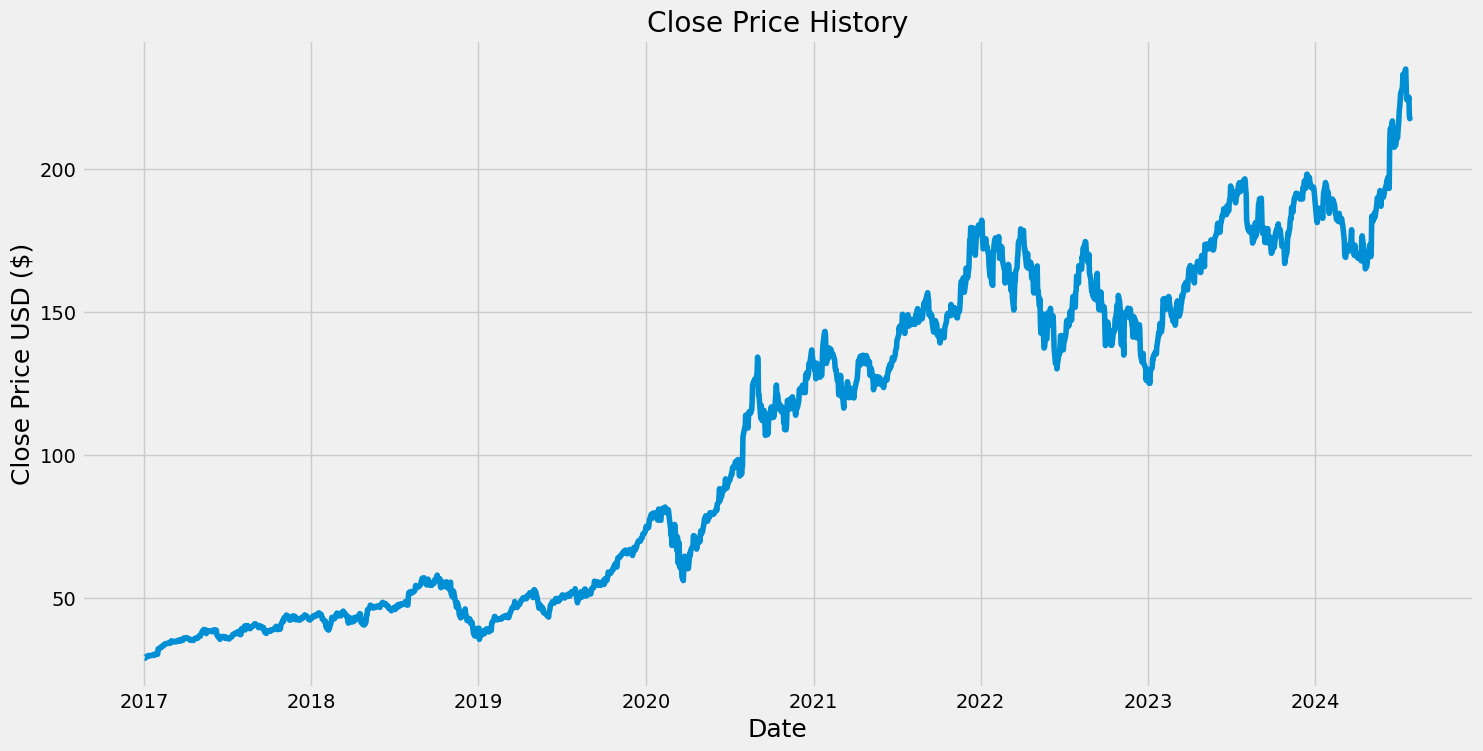

In [ ]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [ ]:
# create a new dataframe with only thr "close column"
data = df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1523

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.57914726e-04],
       [0.00000000e+00],
       [7.16667813e-04],
       ...,
       [9.20899772e-01],
       [9.15798163e-01],
       [9.18081773e-01]])

In [ ]:
# creae the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00015791, 0.        , 0.00071667, 0.00229576, 0.00360761,
       0.00375338, 0.00453077, 0.00392343, 0.00366835, 0.00483444,
       0.00482229, 0.00456721, 0.00483444, 0.00493162, 0.004798  ,
       0.00711804, 0.00719093, 0.00720307, 0.00681437, 0.00647426,
       0.01546292, 0.01519569, 0.01586377, 0.01733352, 0.01883974,
       0.01945922, 0.0199208 , 0.0195564 , 0.02097757, 0.02307899,
       0.02367417, 0.02347983, 0.02392926, 0.02511965, 0.02561767,
       0.02491315, 0.02507107, 0.02539902, 0.02547191, 0.02887301,
       0.02786484, 0.02886087, 0.02832641, 0.02854506, 0.02791342,
       0.02752471, 0.02808348, 0.02815635, 0.02790128, 0.02968687,
       0.02996624, 0.02911596, 0.03090155, 0.02893375, 0.03085295,
       0.03024561, 0.0299055 , 0.03019703, 0.0337439 , 0.03413259])]
[0.033901798855394405]

[array([0.00015791, 0.        , 0.00071667, 0.00229576, 0.00360761,
       0.00375338, 0.00453077, 0.00392343, 0.00366835, 0.00483444,
       0.00482229, 0.00456721, 0.0

In [ ]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1463, 60, 1)

In [ ]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train, batch_size = 1, epochs =1)

1463/1463 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - loss: 0.0091


In [ ]:
#create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data into a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [ ]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.6541547273334705

<ipython-input-158-d6cf345b4652>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


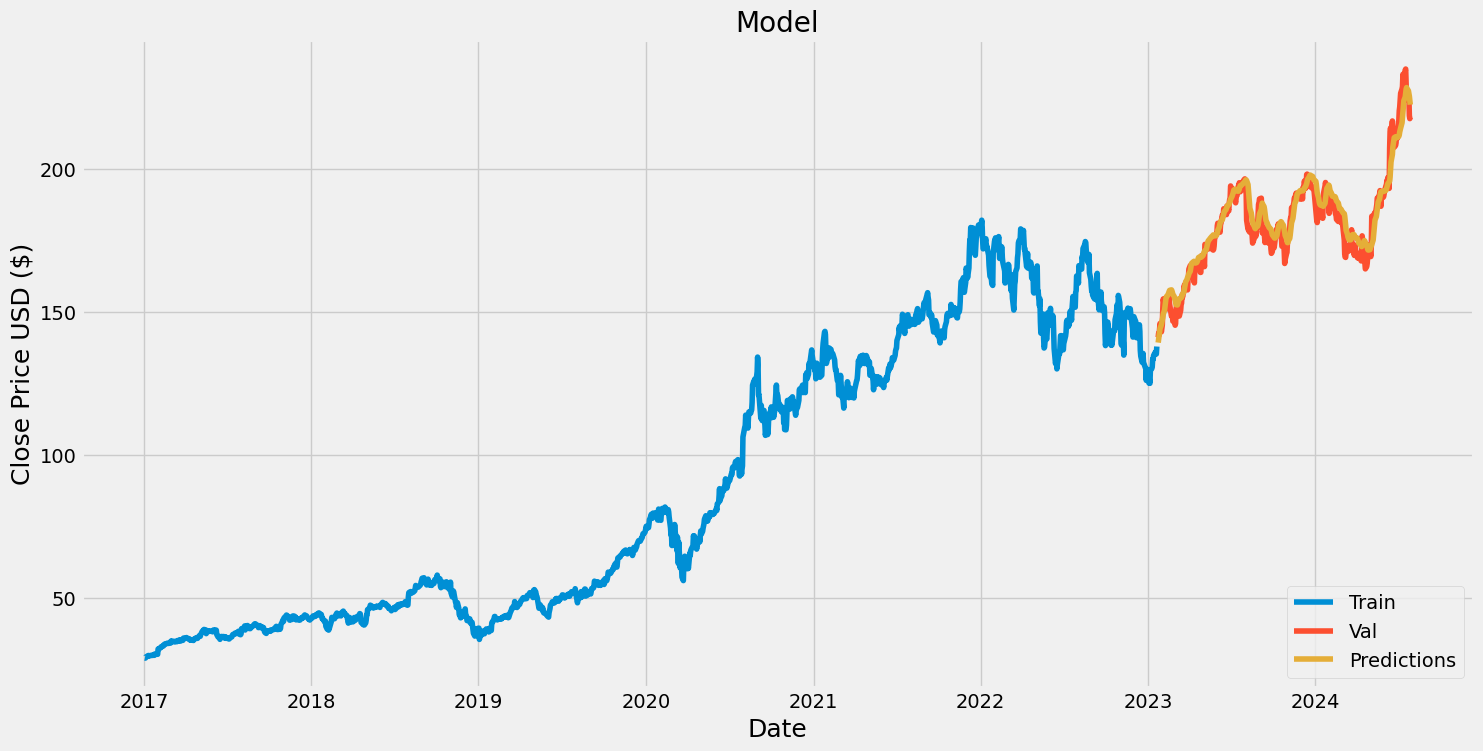

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-01-23,141.110001,139.235001
2023-01-24,142.529999,140.368774
2023-01-25,141.860001,141.670441
2023-01-26,143.960007,142.885025
2023-01-27,145.929993,144.134506
...,...,...
2024-07-22,223.960007,227.211105
2024-07-23,225.009995,226.232498
2024-07-24,218.539993,225.342667


In [ ]:


!pip install yfinance
import yfinance as yf
import pandas as pd

# Get the stock quote
data = yf.download('AAPL', start='2017-01-01', end='2024-07-29')
df = pd.DataFrame(data)  # Convert to a Pandas DataFrame
#create a new data framw
new_df = data.filter(['Close'])
# get the last 60 day closing price values and convert the dataframe into an array
last_60_days = new_df[-60:].values
# scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# create an empty list
X_test = []

#append the past 60 days
X_test.append(last_60_days_scaled)

#convert the X_test data to a numpy array
X_test = np.array(X_test)

#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get the predicted scaled price
pred_price = model.predict(X_test)


#undo the scaling
pred_price = scaler.inverse_transform(pred_price)

# Reset the print function
print = __builtin__.print

#print the price
print(pred_price)


[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[220.89078]]


In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd

# Get the stock quote for a range of dates
data2 = yf.download('AAPL', start='2024-07-29', end='2024-07-31')

print(data2['Close'])


[*********************100%%**********************]  1 of 1 completed

Date
2024-07-29    218.240005
2024-07-30    218.800003
Name: Close, dtype: float64
